# Chapter 5 - Statistics

Statistics refers to the mathematics and techniques with which we understand data. It
is a rich, enormous field, more suited to a shelf (or room) in a library rather than a
chapter in a book, and so our discussion will necessarily not be a deep one. Instead,
I’ll try to teach you just enough to be dangerous, and pique your interest just enough
that you’ll go off and learn more.

## Describing a Single Set of Data

Through a combination of word-of-mouth and luck, DataSciencester has grown to
dozens of members, and the VP of Fundraising asks you for some sort of description
of how many friends your members have that he can include in his elevator pitches.
Using techniques from Chapter 1, you are easily able to produce this data. But now
you are faced with the problem of how to describe it.
One obvious description of any data set is simply the data itself:

In [96]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [97]:
len(num_friends)

204

For a small enough data set this might even be the best description. But for a larger
data set, this is unwieldy and probably opaque. (Imagine staring at a list of 1 million
numbers.) For that reason we use statistics to distill and communicate relevant fea‐
tures of our data.

As a first approach you put the friend counts into a histogram using Counter and
plt.bar()

In [99]:
%matplotlib notebook

In [100]:
from collections import Counter
import matplotlib.pyplot as plt

In [101]:
friend_counts = Counter(num_friends)

In [102]:
friend_counts

Counter({100.0: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         21: 2,
         19: 2,
         18: 2,
         16: 1,
         15: 4,
         14: 2,
         13: 4,
         12: 2,
         11: 1,
         10: 15,
         9: 18,
         8: 13,
         7: 15,
         6: 22,
         5: 17,
         4: 20,
         3: 20,
         2: 17,
         1: 22})

In [103]:
friend_counts[2]

17

<IPython.core.display.Javascript object>


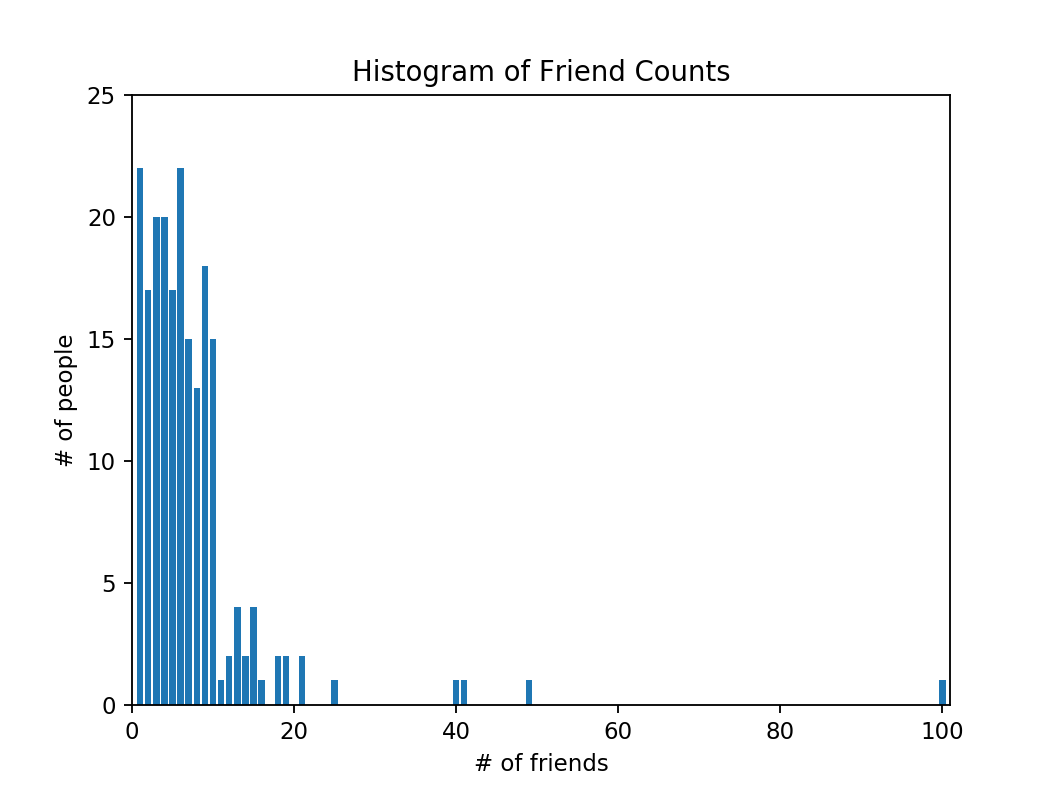

In [104]:
xs = range(101) # largest value is 100.
ys = [friend_counts[x] for x in xs]

plt.bar(xs,ys) # Create histogram based on data xs and ys.
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

Unfortunately, this chart is still too difficult to slip into conversations. So you start
generating some statistics. Probably the simplest statistic is simply the number of data
points:

In [15]:
num_points = len(num_friends)
num_points

204

You’re probably also interested in the largest and smallest values:

In [16]:
largest_value = max(num_friends)
largest_value

100.0

In [17]:
smallest_value = min(num_friends)
smallest_value

1

which are just special cases of wanting to know the values in specific positions:

In [18]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
smallest_value

1

In [19]:
second_smallest_values = sorted_values[1]
second_smallest_values

1

In [20]:
second_largest_value = sorted_values[-2]
second_largest_value

49

## Central Tendencies

Usually, we’ll want some notion of where our data is centered. Most commonly we’ll
use the mean (or average), which is just the sum of the data divided by its count:

In [21]:
def mean(x):
    return sum(x)/len(x)

In [22]:
mean(num_friends)

7.333333333333333

In [24]:
5//2

2

If you have two data points, the mean is simply the point halfway between them. As
you add more points, the mean shifts around, but it always depends on the value of
every point.

We’ll also sometimes be interested in the median, which is the middle-most value (if
the number of data points is odd) or the average of the two middle-most values (if the
number of data points is even).

For instance, if we have five data points in a sorted vector x, the median is x[5 // 2]
or x[2]. If we have six data points, we want the average of x[2] (the third point) and
x[3] (the fourth point).

Notice that—unlike the mean—the median doesn’t depend on every value in your
data. For example, if you make the largest point larger (or the smallest point smaller),
the middle points remain unchanged, which means so does the median.

The median function is slightly more complicated than you might expect, mostly
because of the “even” case:

In [27]:
def median(v):
    """Finds the 'middle-most' value of v."""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    
    if n%2 == 1 :
        # If odd, return the middle value
        return sorted_v[midpoint]
    else:
        # If even, return the average of the middle values.
        lo = midpoint-1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi])/2

In [28]:
median(num_friends)

6.0

Clearly, the mean is simpler to compute, and it varies smoothly as our data changes. If
we have n data points and one of them increases by some small amount e, then neces‐
sarily the mean will increase by e / n. (This makes the mean amenable to all sorts of
calculus tricks.) Whereas in order to find the median, we have to sort our data. And
changing one of our data points by a small amount e might increase the median by e,
by some number less than e, or not at all (depending on the rest of the data).

At the same time, the mean is very sensitive to outliers in our data. If our friendliest
user had 200 friends (instead of 100), then the mean would rise to 7.82, while the
median would stay the same. If outliers are likely to be bad data (or otherwise unrep‐
resentative of whatever phenomenon we’re trying to understand), then the mean can
sometimes give us a misleading picture. For example, the story is often told that in
the mid-1980s, the major at the University of North Carolina with the highest average
starting salary was geography, mostly on account of NBA star (and outlier) Michael
Jordan.

A generalization of the median is the quantile, which represents the value less than
which a certain percentile of the data lies. (The median represents the value less than
which 50% of the data lies.)

In [29]:
def quantile(x,p):
    """Returns the pth-percentile."""
    p_index = int(p*len(x))
    return sorted(x)[p_index]

In [30]:
quantile(num_friends, 0.1)

1

In [31]:
quantile(num_friends, 0.25)

3

In [32]:
quantile(num_friends, 0.5)

6

In [33]:
quantile(num_friends, 0.75)

9

In [34]:
quantile(num_friends, 0.9)

13

Less commonly you might want to look at the mode, or most-common value[s]:

In [46]:
def mode(x):
    """Returns a list, might be more than one mode."""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i,count in counts.items() if count == max_count]

In [47]:
mode(num_friends)

[6, 1]

## Dispersion

Dispersion refers to measures of how spread out our data is. Typically they’re statistics
for which values near zero signify not spread out at all and for which large values
(whatever that means) signify very spread out. For instance, a very simple measure is
the range, which is just the difference between the largest and smallest elements:

In [50]:
# "range" already means something in Python, so we'll use a different name.
def data_range(x):
    return max(x)-min(x)

In [51]:
data_range(num_friends)

99.0

The range is zero precisely when the max and min are equal, which can only happen if
the elements of x are all the same, which means the data is as undispersed as possible.
Conversely, if the range is large, then the max is much larger than the min and the data
is more spread out.

Like the median, the range doesn’t really depend on the whole data set. A data set
whose points are all either 0 or 100 has the same range as a data set whose values are
0, 100, and lots of 50s. But it seems like the first data set “should” be more spread out.

A more complex measure of dispersion is the variance, which is computed as:

In [62]:
def dot(v,w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i*w_i for v_i,w_i in zip(v,w))

In [63]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v,v)

In [64]:
def de_mean(x):
    """Translate x by subtracting its mean (so the result has mean 0)."""
    x_bar = mean(x)
    return [x_i-x_bar for x_i in x]

In [65]:
def variance(x):
    """Assumes x has at least two elements."""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations)/(n-1)

In [66]:
variance(num_friends)

81.54351395730716

Now, whatever units our data is in (e.g., “friends”), all of our measures of central ten‐
dency are in that same unit. The range will similarly be in that same unit. The var‐
iance, on the other hand, has units that are the square of the original units (e.g.,
“friends squared”). As it can be hard to make sense of these, we often look instead at
the standard deviation:

In [69]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

In [70]:
standard_deviation(num_friends)

9.03014473623248

Both the range and the standard deviation have the same outlier problem that we saw
earlier for the mean. Using the same example, if our friendliest user had instead 200
friends, the standard deviation would be 14.89, more than 60% higher!

A more robust alternative computes the difference between the 75th percentile value
and the 25th percentile value:

In [71]:
def interquartile_range(x):
    return quantile(x,0.75)-quantile(x,0.25)

In [72]:
interquartile_range(num_friends)

6

which is quite plainly unaffected by a small number of outliers.

## Correlation

DataSciencester’s VP of Growth has a theory that the amount of time people spend
on the site is related to the number of friends they have on the site (she’s not a VP for
nothing), and she’s asked you to verify this.

After digging through traffic logs, you’ve come up with a list daily_minutes that
shows how many minutes per day each user spends on DataSciencester, and you’ve
ordered it so that its elements correspond to the elements of our previous
num_friends list. We’d like to investigate the relationship between these two metrics.

We’ll first look at covariance, the paired analogue of variance. Whereas variance
measures how a single variable deviates from its mean, covariance measures how two
variables vary in tandem from their means:

In [73]:
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y))/(n-1)

In [74]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [75]:
covariance(num_friends, daily_minutes)

22.425435139573064

Recall that dot sums up the products of corresponding pairs of elements. When cor‐
responding elements of x and y are either both above their means or both below their
means, a positive number enters the sum. When one is above its mean and the other
below, a negative number enters the sum. Accordingly, a “large” positive covariance
means that x tends to be large when y is large and small when y is small. A “large”
negative covariance means the opposite—that x tends to be small when y is large and
vice versa. A covariance close to zero means that no such relationship exists.

Nonetheless, this number can be hard to interpret, for a couple of reasons:
* Its units are the product of the inputs’ units (e.g., friend-minutes-per-day), which
can be hard to make sense of. (What’s a “friend-minute-per-day”?)
* If each user had twice as many friends (but the same number of minutes), the
covariance would be twice as large. But in a sense the variables would be just as
interrelated. Said differently, it’s hard to say what counts as a “large” covariance.

For this reason, it’s more common to look at the correlation, which divides out the
standard deviations of both variables:

In [76]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x>0 and stdev_y > 0:
        return covariance(x,y)/ stdev_x / stdev_y
    else:
        return 0 # If no variation, correlation is zero.

In [77]:
correlation(num_friends, daily_minutes)

0.24736957366478218

The correlation is unitless and always lies between -1 (perfect anti-correlation) and
1 (perfect correlation). A number like 0.25 represents a relatively weak positive corre‐
lation.

However, one thing we neglected to do was examine our data. Check out Figure 5-2.

![](corr_outlier.jpg)

The person with 100 friends (who spends only one minute per day on the site) is a
huge outlier, and correlation can be very sensitive to outliers. What happens if we
ignore him?

In [86]:
outlier = num_friends.index(100) # Index of outlier

num_friends_good = [x for i,x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i,x in enumerate(daily_minutes) if i != outlier]

In [87]:
correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

Without the outlier, there is a much stronger correlation (Figure 5-3).

![](corr_wo_outlier.jpg)

You investigate further and discover that the outlier was actually an internal test
account that no one ever bothered to remove. So you feel pretty justified in excluding
it.

## Simpson’s Paradox

One not uncommon surprise when analyzing data is Simpson’s Paradox, in which
correlations can be misleading when confounding variables are ignored.

For example, imagine that you can identify all of your members as either East Coast
data scientists or West Coast data scientists. You decide to examine which coast’s data
scientists are friendlier:

![](ew_coast.jpg)

It certainly looks like the West Coast data scientists are friendlier than the East Coast
data scientists. Your coworkers advance all sorts of theories as to why this might be:
maybe it’s the sun, or the coffee, or the organic produce, or the laid-back Pacific vibe?

When playing with the data you discover something very strange. If you only look at
people with PhDs, the East Coast data scientists have more friends on average. And if
you only look at people without PhDs, the East Coast data scientists also have more
friends on average!

![](ew_coast_phd.jpg)

Once you account for the users’ degrees, the correlation goes in the opposite direc‐
tion! Bucketing the data as East Coast/West Coast disguised the fact that the East
Coast data scientists skew much more heavily toward PhD types.

This phenomenon crops up in the real world with some regularity. The key issue is
that correlation is measuring the relationship between your two variables all else being
equal. If your data classes are assigned at random, as they might be in a well-designed
experiment, “all else being equal” might not be a terrible assumption. But when there
is a deeper pattern to class assignments, “all else being equal” can be an awful assump‐
tion.

The only real way to avoid this is by knowing your data and by doing what you can to
make sure you’ve checked for possible confounding factors. Obviously, this is not
always possible. If you didn’t have the educational attainment of these 200 data scien‐
tists, you might simply conclude that there was something inherently more sociable
about the West Coast.

## Some Other Correlational Caveats

A correlation of zero indicates that there is no linear relationship between the two
variables. However, there may be other sorts of relationships. For example, if:

In [90]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]

then x and y have zero correlation. But they certainly have a relationship—each ele‐
ment of y equals the absolute value of the corresponding element of x. What they don’t have is a relationship in which knowing how x_i compares to mean(x) gives us
information about how y_i compares to mean(y). That is the sort of relationship that
correlation looks for.

In addition, correlation tells you nothing about how large the relationship is. The
variables:

In [91]:
x = [-2, 1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

are perfectly correlated, but (depending on what you’re measuring) it’s quite possible
that this relationship isn’t all that interesting.

## Correlation and Causation

You have probably heard at some point that “correlation is not causation,” most likely
by someone looking at data that posed a challenge to parts of his worldview that he
was reluctant to question. Nonetheless, this is an important point—if x and y are
strongly correlated, that might mean that x causes y, that y causes x, that each causes
the other, that some third factor causes both, or it might mean nothing.

Consider the relationship between num_friends and daily_minutes. It’s possible that
having more friends on the site causes DataSciencester users to spend more time on
the site. This might be the case if each friend posts a certain amount of content each
day, which means that the more friends you have, the more time it takes to stay current with their updates.

However, it’s also possible that the more time you spend arguing in the DataSciences‐
ter forums, the more you encounter and befriend like-minded people. That is, spending more time on the site causes users to have more friends.

A third possibility is that the users who are most passionate about data science spend
more time on the site (because they find it more interesting) and more actively collect
data science friends (because they don’t want to associate with anyone else).

One way to feel more confident about causality is by conducting randomized trials. If
you can randomly split your users into two groups with similar demographics and
give one of the groups a slightly different experience, then you can often feel pretty
good that the different experiences are causing the different outcomes.

For instance, if you don’t mind being angrily accused of experimenting on your users,
you could randomly choose a subset of your users and show them content from only
a fraction of their friends. If this subset subsequently spent less time on the site, this
would give you some confidence that having more friends causes more time on the
site.